<a href="https://colab.research.google.com/github/muniprasadreddy/my-colab_work/blob/main/open_Cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import numpy as np

In [ ]:


# Define the path to the folder containing your image dataset
dataset_folder = "/content/drive/MyDrive/open cv"
width, height = 100, 100  # Define the desired width and height for resizing

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through each folder (class) in the dataset folder
for class_name in os.listdir(dataset_folder):
    class_folder = os.path.join(dataset_folder, class_name)

    # Check if the current item in the dataset folder is a directory
    if os.path.isdir(class_folder):
        # Iterate through each image file in the class folder
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)

            # Read the image using OpenCV
            image = cv2.imread(image_path)

            # If the image is successfully loaded
            if image is not None:
                # Resize the image to a common size if needed
                image = cv2.resize(image, (width, height))

                # Append the image and corresponding label to the lists
                images.append(image)
                labels.append(class_name)


array([[[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       ...,

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[246, 246, 246],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]]], dtype=uint8)
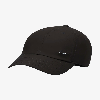

In [ ]:
image

In [ ]:
#Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Optionally, you can perform further preprocessing or data augmentation here

# Print the shape of the image dataset and labels
print("Image dataset shape:", images.shape)
print("Labels:", labels)


Image dataset shape: (845, 100, 100, 3)
Labels: ['Bag - Google Search' 'Bag - Google Search' 'Bag - Google Search'
 'Bag - Google Search' 'Bag - Google Search' 'Bag - Google Search'
 'Bag - Google Search' 'Bag - Google Search' 'Bag - Google Search'
 'Bag - Google Search' 'Bag - Google Search' 'Bag - Google Search'
 'Bag - Google Search' 'Bag - Google Search' 'Bag - Google Search'
 'Bag - Google Search' 'Bag - Google Search' 'Bag - Google Search'
 'Bag - Google Search' 'Bag - Google Search' 'Bag - Google Search'
 'Bottle - Google Search' 'Bottle - Google Search'
 'Bottle - Google Search' 'Bottle - Google Search'
 'Bottle - Google Search' 'Bottle - Google Search'
 'Bottle - Google Search' 'Bottle - Google Search'
 'Bottle - Google Search' 'Bottle - Google Search'
 'Bottle - Google Search' 'Bottle - Google Search'
 'Bottle - Google Search' 'Bottle - Google Search'
 'Bottle - Google Search' 'Bottle - Google Search'
 'Bottle - Google Search' 'Bottle - Google Search'
 'Bottle - Google Search

# Data **Augmentation**

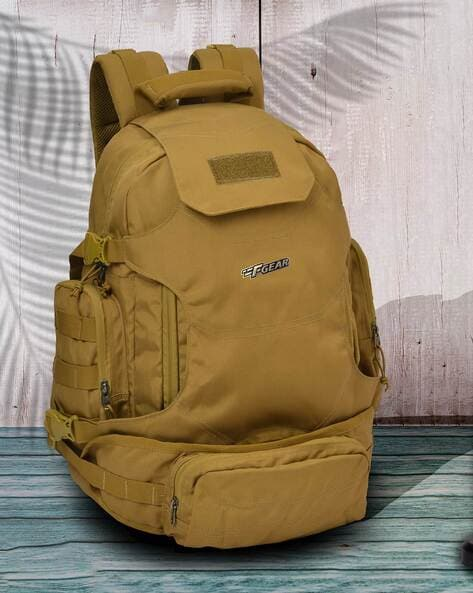

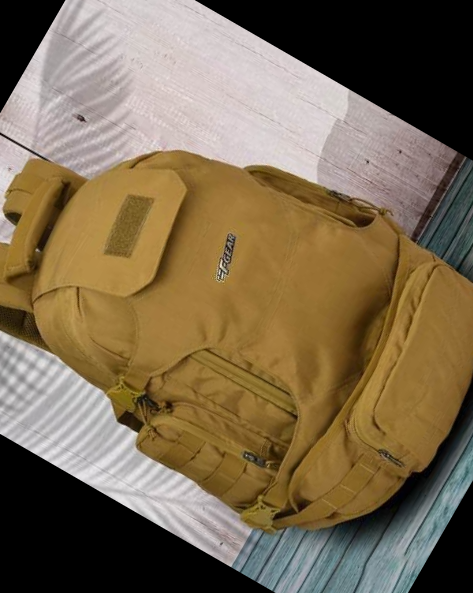

In [ ]:
import cv2
import numpy as np

# Example function for rotating images
def rotate_image(image, angle):
    # Get image dimensions
    height, width = image.shape[:2]
    # Calculate rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    # Apply rotation to the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

# Load an example image
image_path = "/content/drive/MyDrive/open cv/Bag - Google Search/-473Wx593H-460327847-khaki-MODEL.jpg"  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image is loaded properly
if image is None:
    print(f"Error: Image not found at {image_path}")
else:
    # Rotate the image by 90 degrees
    rotated_image = rotate_image(image, 60)

    # Display the original and rotated images
    from google.colab.patches import cv2_imshow

    cv2_imshow(image)
    cv2_imshow(rotated_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

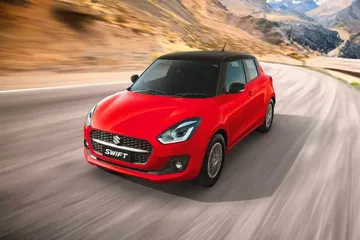

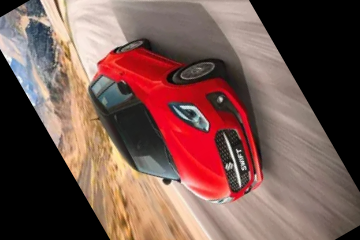

In [ ]:


# Load an example image
image_path = "/content/drive/MyDrive/open cv/cars - Google Search/front-left-side-47.jpg"  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image is loaded properly
if image is None:
    print(f"Error: Image not found at {image_path}")
else:
    # Rotate the image by 90 degrees
    rotated_image = rotate_image(image, 120)

    # Display the original and rotated images
    from google.colab.patches import cv2_imshow

    cv2_imshow(image)
    cv2_imshow(rotated_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Image **Manipulation**

In [ ]:
# Example function for adjusting brightness and contrast
def adjust_brightness_contrast(image, brightness=0, contrast=0):
    # Convert image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    # Split LAB channels
    l_channel, a_channel, b_channel = cv2.split(lab_image)
    # Apply brightness and contrast adjustments to the L channel
    l_channel = np.clip(l_channel.astype(np.int16) + brightness, 0, 255)
    l_channel = np.clip((contrast / 127 + 1) * (l_channel.astype(np.float64) - 127) + 127, 0, 255)
    # Merge LAB channels
    adjusted_lab_image = cv2.merge((l_channel.astype(np.uint8), a_channel, b_channel))
    # Convert LAB image back to BGR color space
    adjusted_image = cv2.cvtColor(adjusted_lab_image, cv2.COLOR_LAB2BGR)
    return adjusted_image




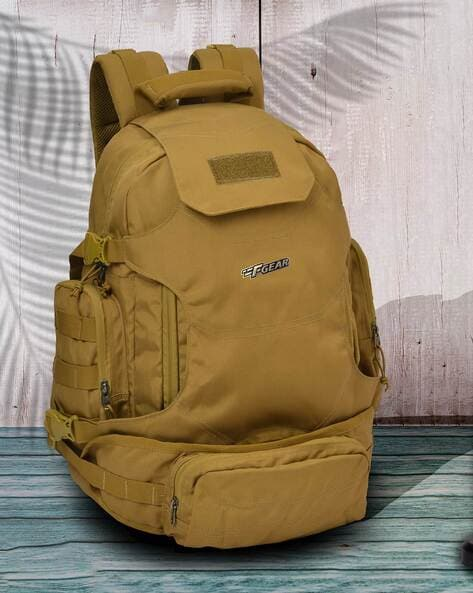

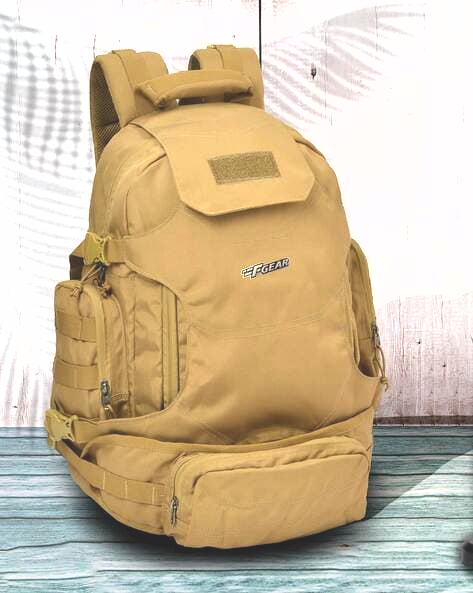

In [ ]:
# Load an example image
image = cv2.imread("/content/drive/MyDrive/open cv/Bag - Google Search/-473Wx593H-460327847-khaki-MODEL.jpg")

# Adjust brightness and contrast of the image
adjusted_image = adjust_brightness_contrast(image, brightness=50, contrast=20)

# Display the original and adjusted images
from google.colab.patches import cv2_imshow

cv2_imshow(image)
cv2_imshow(adjusted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

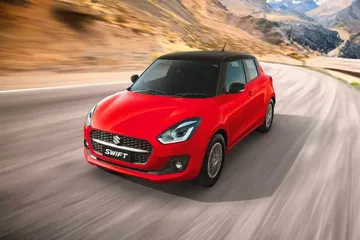

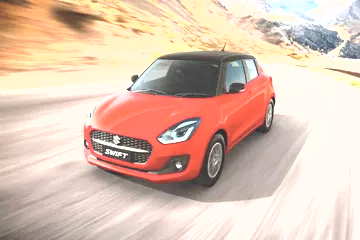

In [ ]:
# Load an example image
image = cv2.imread("/content/drive/MyDrive/open cv/cars - Google Search/front-left-side-47.jpg")

# Adjust brightness and contrast of the image
adjusted_image = adjust_brightness_contrast(image, brightness=60, contrast=30)

# Display the original and adjusted images
from google.colab.patches import cv2_imshow

cv2_imshow(image)
cv2_imshow(adjusted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# **Model Architecture**

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.utils as vutils
import numpy as np

# Define the generator model
def build_generator():
    model = models.Sequential([
        layers.Dense(7 * 7 * 128, input_dim=100),
        layers.Reshape((7, 7, 128)),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', activation='relu'),
        layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', activation='relu'),
        layers.Conv2DTranspose(1, (7, 7), padding='same', activation='sigmoid')
    ])
    return model

# Define the discriminator model
def build_discriminator():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=(28, 28, 1)),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.4),
        layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.4),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Build the generator and discriminator
generator = build_generator()
discriminator = build_discriminator()

# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build and compile the GAN model
discriminator.trainable = False
gan = models.Sequential([generator, discriminator])
gan.compile(loss='binary_crossentropy', optimizer='adam')
#Train the GAN model with your product image dataset
X_train = "/content/drive/MyDrive/open cv
gan.fit(X_train, epochs=epochs, batch_size=batch_size)

IndexError: tuple index out of range


# Training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.utils as vutils
import numpy as np

# Define the number of epochs and batch size
epochs = 20
batch_size = 32

num_batches = len(dataset_folder) // batch_size


# Iterate over epochs
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    # Iterate over batches of data
    for batch in range(num_batches):
        # Sample a batch of real images using the imported function
        real_images = sample_real_images(batch_size)

        # Generate a batch of fake images
        # Sample noise vectors as input to the generator (placeholder)
        # Replace sample_noise(batch_size) with actual code to generate random noise vectors
        noise = sample_noise(batch_size)
        fake_images = generator.predict(noise)

        # Train the discriminator
        real_loss = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        fake_loss = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
        discriminator

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


# **Data Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.8, 1.2),
    channel_shift_range=20,
    fill_mode='nearest',
)

# Example usage: augmenting images in a batch
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=32):
    # Training loop here (e.g., GAN training)
    pass


NameError: name 'X_train' is not defined